# Experiments with textual misinformation detection using machine learning models
In this experiment, we train and test machine learning models for detecting misinformation based purely on the text. We evaluated the performance of 5 classification models with wide use in text classification problems.

**Models:**
* Logistic regression
* Bernoulli Naive-Bayes
* Complementary Naive-Bayes
* Linear SVM with SGD training
* Linear SVM
* SVM
* KNN
* Random forest
* Gradient Boosting
* Multilayer Perceptron


**References:**
* https://towardsdatascience.com/text-classification-in-python-dd95d264c802
* https://github.com/miguelfzafra/Latest-News-Classifier/tree/master/0.%20Latest%20News%20Classifier/04.%20Model%20Training


In [1]:
#utils
import emoji, re, string, time, os
from utils import get_test_metrics
from utils import preprocess
import pandas as pd
import numpy as np
from scipy.stats import randint
import pickle

#nlp
import nltk
from nltk.corpus import stopwords
import spacy
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec

#dataviz
import matplotlib.pyplot as plt
import seaborn as sns

#features
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

#models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble  import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn import tree

#data balancing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# K-Fold
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

%matplotlib inline
sns.set(style="darkgrid")



## Experiments
1. Oversampling/Undersampling
* Char-level CNN
* Train only with long texts
* Train only with short texts
* Train a classifier for long texts, another for short texts and combine results
* Train only with sentences
* Extract features with heuristics: 'ask_for_share', 'text_formatting',      'exaggerated_punctuation', 'informal_poll', 'ref_to_media', 'political_view', 'entities', 'hate_speech'
* Hadcrafted features: 'words', 'characters', 'uppercase count', 'lowercase count', 'lowercase ratio', 'uppercase ratio', 'line breaks',  'line breaks radio', 'number of urls', 'urls ratio', 'total emojis', 'unique emojis', 'variability emojis', 'emoji ratio', 'total punctuation signs', 'unique punctuation signs', 'variability punctuation signs', 'punctuation signs ratio', 'total exclamation signs', 'exclamation ratio'
* Use automatic labelled data
* Word embeddings



In [2]:
base = '2018'
subset = 'embeddings'
results_dir = 'results/' + str(base) + '/' + subset + '/ml/'
results_dir

'results/2018/embeddings/ml/'

In [3]:
#data_dir = 'data/' + str(base) #+ '/vis_processed_texts.p'
#filepath = 'data/' + str(base) + '/fakeWhatsApp.BR_' + str(base) + '.csv'
df = pd.read_csv('data/2018/fakeWhatsApp.BR_2018.csv')
#non_viral_mis = df[(df['viral']==0) & (df['misinformation']==1)]['text'].unique()
#non_viral_non_mis = df[(df['viral']==0) & (df['misinformation']==0)].sample(n=len(non_viral_mis))['text'].unique()
#non_viral = list(non_viral_mis) + list(non_viral_non_mis)

/home/cabral/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#y_non_viral = [1]*len(non_viral_mis) + [0]*len(non_viral_non_mis)

# Word2Vec training

In [13]:
corpus = df['text'].unique()
print(len(corpus))

114445


In [14]:
#pre_corpus = [preprocess(cp) for cp in corpus]

In [15]:
#pickle.dump(pre_corpus, open( "data/2018/pre_processed_corpus.p", "wb" ))
pre_corpus = pickle.load(open( "data/2018/pre_processed_corpus.p", "rb" ) )
pre_corpus = [p.split() for p in pre_corpus]

In [17]:
class EpochLogger(CallbackAny2Vec):
    """Callback to log information about training"""

    def __init__(self):
        self.epoch = 0

    def on_epoch_begin(self, model):
        self.epoch += 1
        print("W2V: Epoch #{}".format(self.epoch))
        
epoch_logger = EpochLogger()

model = Word2Vec(min_count=1)
model.build_vocab(pre_corpus)  # prepare the model vocabulary
model.train(pre_corpus, total_examples=model.corpus_count, epochs=1000, compute_loss=True, callbacks=[epoch_logger])
#model = Word2Vec(sentences=pre_corpus, vector_size=100, window=5, min_count=1, workers=4)
model.save("data/2018/word2vec.model")

W2V: Epoch #1
W2V: Epoch #2
W2V: Epoch #3
W2V: Epoch #4
W2V: Epoch #5
W2V: Epoch #6
W2V: Epoch #7
W2V: Epoch #8
W2V: Epoch #9
W2V: Epoch #10
W2V: Epoch #11
W2V: Epoch #12
W2V: Epoch #13
W2V: Epoch #14
W2V: Epoch #15
W2V: Epoch #16
W2V: Epoch #17
W2V: Epoch #18
W2V: Epoch #19
W2V: Epoch #20
W2V: Epoch #21
W2V: Epoch #22
W2V: Epoch #23
W2V: Epoch #24
W2V: Epoch #25
W2V: Epoch #26
W2V: Epoch #27
W2V: Epoch #28
W2V: Epoch #29
W2V: Epoch #30
W2V: Epoch #31
W2V: Epoch #32
W2V: Epoch #33
W2V: Epoch #34
W2V: Epoch #35
W2V: Epoch #36
W2V: Epoch #37
W2V: Epoch #38
W2V: Epoch #39
W2V: Epoch #40
W2V: Epoch #41
W2V: Epoch #42
W2V: Epoch #43
W2V: Epoch #44
W2V: Epoch #45
W2V: Epoch #46
W2V: Epoch #47
W2V: Epoch #48
W2V: Epoch #49
W2V: Epoch #50
W2V: Epoch #51
W2V: Epoch #52
W2V: Epoch #53
W2V: Epoch #54
W2V: Epoch #55
W2V: Epoch #56
W2V: Epoch #57
W2V: Epoch #58
W2V: Epoch #59
W2V: Epoch #60
W2V: Epoch #61
W2V: Epoch #62
W2V: Epoch #63
W2V: Epoch #64
W2V: Epoch #65
W2V: Epoch #66
W2V: Epoch #67
W2V:

W2V: Epoch #520
W2V: Epoch #521
W2V: Epoch #522
W2V: Epoch #523
W2V: Epoch #524
W2V: Epoch #525
W2V: Epoch #526
W2V: Epoch #527
W2V: Epoch #528
W2V: Epoch #529
W2V: Epoch #530
W2V: Epoch #531
W2V: Epoch #532
W2V: Epoch #533
W2V: Epoch #534
W2V: Epoch #535
W2V: Epoch #536
W2V: Epoch #537
W2V: Epoch #538
W2V: Epoch #539
W2V: Epoch #540
W2V: Epoch #541
W2V: Epoch #542
W2V: Epoch #543
W2V: Epoch #544
W2V: Epoch #545
W2V: Epoch #546
W2V: Epoch #547
W2V: Epoch #548
W2V: Epoch #549
W2V: Epoch #550
W2V: Epoch #551
W2V: Epoch #552
W2V: Epoch #553
W2V: Epoch #554
W2V: Epoch #555
W2V: Epoch #556
W2V: Epoch #557
W2V: Epoch #558
W2V: Epoch #559
W2V: Epoch #560
W2V: Epoch #561
W2V: Epoch #562
W2V: Epoch #563
W2V: Epoch #564
W2V: Epoch #565
W2V: Epoch #566
W2V: Epoch #567
W2V: Epoch #568
W2V: Epoch #569
W2V: Epoch #570
W2V: Epoch #571
W2V: Epoch #572
W2V: Epoch #573
W2V: Epoch #574
W2V: Epoch #575
W2V: Epoch #576
W2V: Epoch #577
W2V: Epoch #578
W2V: Epoch #579
W2V: Epoch #580
W2V: Epoch #581
W2V: Epo

In [20]:
model.most_similar(positive=['viado'])

/home/cabral/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('macho', 0.47070351243019104),
 ('homossexual', 0.4347902834415436),
 ('perversidade', 0.4255024790763855),
 ('saliente', 0.4246169924736023),
 ('robosinho', 0.4213918447494507),
 ('fascista', 0.41151732206344604),
 ('giria', 0.41151249408721924),
 ('zelota', 0.40839922428131104),
 ('ifsp', 0.39898374676704407),
 ('idolo', 0.3970032334327698)]

In [21]:
w2v = Word2Vec.load("data/2018/word2vec.model")

In [22]:
w2v.most_similar(positive=['viado'])

/home/cabral/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('macho', 0.47070351243019104),
 ('homossexual', 0.4347902834415436),
 ('perversidade', 0.4255024790763855),
 ('saliente', 0.4246169924736023),
 ('robosinho', 0.4213918447494507),
 ('fascista', 0.41151732206344604),
 ('giria', 0.41151249408721924),
 ('zelota', 0.40839922428131104),
 ('ifsp', 0.39898374676704407),
 ('idolo', 0.3970032334327698)]

In [11]:
df = df[(df['viral']==1)]
df = df[df['midia']==0]
#df = pd.concat([df,non_viral_mis])
#df = df[df['words']>50]
print(len(df))
df.head(5)   

15811


,id,date,hour,ddi,country,country_iso3,ddd,state,group,midia,url,characters,words,viral,sharings,text,misinformation,preprocessed_text
1,3631133147603888180,01/08/18,13:24,55,BRASIL,BRA,17,São Paulo,2018_1,0,0,58,9,1,2,O Bolsonaro tem que estar preparado pra respon...,0,o bolsonaro estar preparar responder assim
10,3631133147603888180,10/08/18,14:31,55,BRASIL,BRA,17,São Paulo,2018_1,0,0,99,18,1,2,"No dia 07 de Outubro, quando for votar, não es...",1,o dia [num] outubro votar esquecer esquerdopat...
15,-4391661641377612003,11/08/18,19:28,55,BRASIL,BRA,13,São Paulo,2018_1,0,0,114,17,1,6,Devido a aborrecimentos nas varias redes socia...,0,dever aborrecimento variar rede social postar ...
18,3631133147603888180,15/08/18,19:23,55,BRASIL,BRA,17,São Paulo,2018_1,0,1,330,47,1,7,EU GOSTARIA DE PEDIR A TODOS DO GRUPOS ENTREM ...,0,eu gostar pedir todo grupo entrar neste link v...
36,-4391661641377612003,22/08/18,22:11,55,BRASIL,BRA,13,São Paulo,2018_1,0,0,226,39,1,8,Como são as coisas.\nChefe do jacaré aparece n...,1,comer coisa chefe jacaré aparecer video balear...


In [12]:
# misinformation = list(df[df['misinformation']==1]['text'])
# misinformation = [preprocess(m,semi=True, rpunct = False, remoji = True) for m in misinformation]
# misinformation = ' '.join(misinformation)
# misinformation

In [13]:
# text_file = open('misinformation.txt','wt')
# text_file.write(misinformation)
# text_file.close()

# Let's take a look in the data

In [14]:
for m in df[df['misinformation']==1]['text'].unique()[0:10]:
    print()
    print(m)
    print()
    print('..................................')


No dia 07 de Outubro, quando for votar, não esqueça do que os esquerdopatas pensam da classe média.

..................................

Como são as coisas.
Chefe do jacaré aparece no video baleado e pessoal no video falando que é morador, falam muita merda tentando colocar as forças armadas como vilão.
Quando chegou no hospital foi reconhecido e preso pela PM.

..................................

*No Ceará, o Comando Vermelho( CV ) PROIBIU propaganda de BOLSONARO  nos territórios que* *"administra"*
*Somente LULA E CIRO Podem.  Por serem aliados do CRIME.*
Alguém tem dúvida agora da quadrilha?  

https://www.opovo.com.br/jornal/reportagem/2018/08/a-interferencia-das-faccoes-criminosas-no-processo-eleitoral.html

*Agora é oficial*

..................................

Como falar que o cara não pode ser presidente se em 27 minutos ele:
- lembrou que o bonner levou chifre
- que bonner ganha 4x mais que a Renata
- Mostrou que o kit gay pode ser usado na escola mas não mostrado na TV 22h d

In [15]:
for m in df[df['misinformation']==0]['text'].unique()[0:10]:
    print()
    print(m)
    print()
    print('..................................')


O Bolsonaro tem que estar preparado pra responder assim...

..................................

Devido a aborrecimentos nas varias redes sociais não vou postar mais nada de política,agora so mulheres bonitas...

..................................

EU GOSTARIA DE PEDIR A TODOS DO GRUPOS ENTREM NESTE LINK VOTE E ESCOLHA SEU CANDIDATO A PRESIDENTE E COMPARTILHEM AO MAXIMO NAS REDES SOCIAIS DE NORTE A SUL DE LESTE A OESTE , INDIFERENTE DE SUA IDEOLOGIA 

*Detalhe:Vc não consegue votar 2 vezes ou mais.*

https://www.opinionstage.com/palmelonews1/em-quem-vc-vota-para-presidente

..................................

A ratoeira funcionou mais a ratazana aguentou a dor calada kkkkkkkk

..................................

Duas das maiores potências em vendas no Mundo, Coca Cola e Havaianas, se uniram para a maior campanha educacional visando a redução da criminalidade no país.

..................................

Relaxando no sofá, barriguinha plusize, 9mm na cintura, sem coldre, no pelo, com sa

# Corpus statistics

In [16]:
df.describe()[['characters','words','sharings']]

,characters,words,sharings
count,15811.000000,15811.000000,15811.000000
mean,535.043135,82.963253,12.347100
std,904.121692,142.519667,17.134031
min,23.000000,6.000000,2.000000
25%,112.000000,17.000000,2.000000
50%,201.000000,30.000000,5.000000
75%,504.000000,80.000000,14.000000
max,15683.000000,2664.000000,91.000000


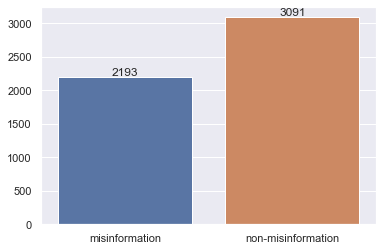

In [17]:
#removing duplicates    
df = df.drop_duplicates(subset=['text'])    
texts = df[df['midia']==0]['text']
y = df[df['midia']==0]['misinformation']

#print('data after remove duplicates')
pos_mask = y == 1 
pos = y[pos_mask]
neg_mask = y == 0 
neg = y[neg_mask]
values = [pos.shape[0],neg.shape[0]]
keys = ['misinformation', 'non-misinformation']
g = sns.barplot(x = keys, y = values)
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
                                               p.get_height()), ha = 'center', 
               va = 'center', xytext = (0, 5), textcoords = 'offset points')

In [18]:
print(len(texts))
print(len(y))

5284
5284


In [19]:
def avgSizeWords(string):
    list_string = string.split()
    chars = np.array([len(s) for s in list_string])
    return chars.mean()    
df['types'] = [len(set(t.split())) for t in df['text']]
df['types/token ratio'] = df['types']/df['words']
df['char/word ratio'] = df['characters']/df['words']
df['average chars by word'] = [avgSizeWords(t) for t in df['text']]

In [20]:
mis = df[df['misinformation']==1][['words','types','types/token ratio' ,'characters', 'char/word ratio', 'average chars by word','sharings']].mean().to_frame().rename(columns={0: "misinformation"})
non_mis = df[df['misinformation']==0][['words','types','types/token ratio' ,'characters', 'char/word ratio', 'average chars by word','sharings']].mean().to_frame().rename(columns={0: "non-misinformation"})
mis.join(non_mis, lsuffix='_misinformation', rsuffix='_non-misinformation')

,misinformation,non-misinformation
words,106.556772,51.279198
types,73.787506,38.030087
types/token ratio,0.855165,0.912381
characters,674.312358,350.283727
char/word ratio,6.727408,7.277105
average chars by word,5.669311,6.242654
sharings,4.830825,3.325137


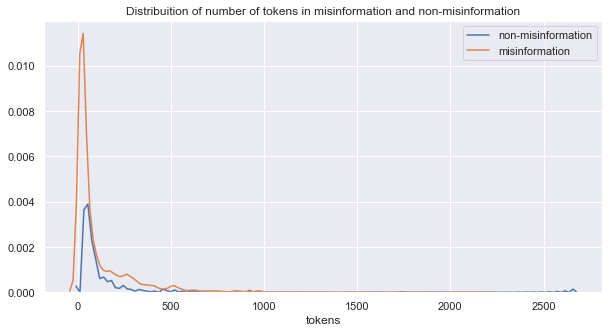

In [21]:
df['tokens'] = df['words']
plt.figure(figsize=(10, 5))
plt.title('Distribuition of number of tokens in misinformation and non-misinformation')
sns.distplot(df[df['misinformation']==0]['tokens'], hist = False, kde = True, label = 'non-misinformation')
sns.distplot(df[df['misinformation']==1]['tokens'], hist = False, kde = True, label = 'misinformation')
plt.show()

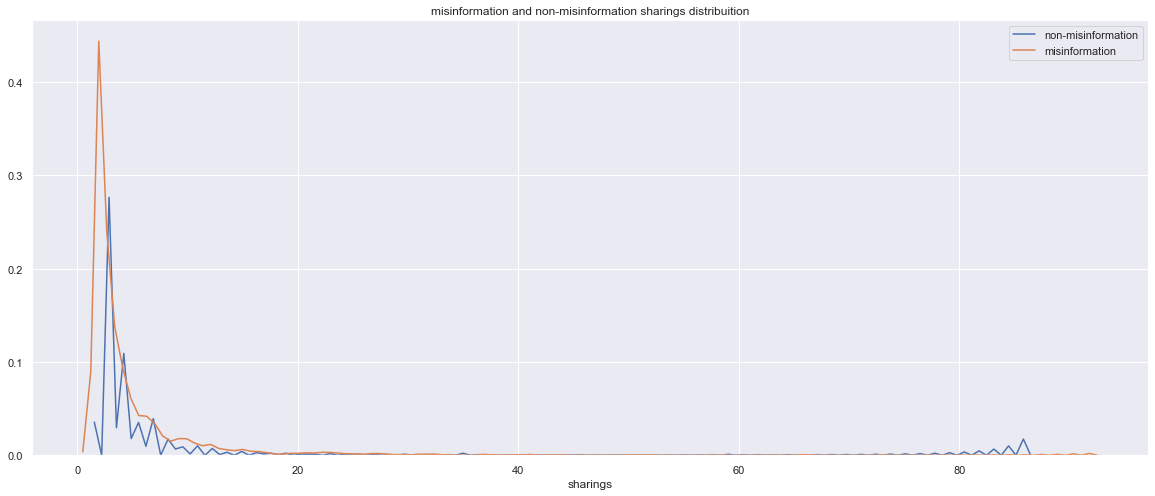

In [22]:
plt.figure(figsize=(20, 8))
plt.title('misinformation and non-misinformation sharings distribuition')
sns.distplot(df[df['misinformation']==0]['sharings'], hist = False, kde = True, label = 'non-misinformation')
sns.distplot(df[df['misinformation']==1]['sharings'], hist = False, kde = True, label = 'misinformation')
plt.show()

# Pre-processing
* convert url in just the domain
* separate emojis
* punctuation

[Some suggestions in this work](https://github.com/miguelfzafra/Latest-News-Classifier/blob/master/0.%20Latest%20News%20Classifier/03.%20Feature%20Engineering/03.%20Feature%20Engineering.ipynb)

* **Special character cleaning**

* **Upcase/downcase**

* **Punctuation signs** 

* **Possessive pronouns**

* **Stemming or Lemmatization**

* **Stop words**

In [23]:
# just first sentence
if 'sentence' in subset:
    df['pre_processed_text'] = [preprocess(t, sentence = True) for t in texts]
    df['semi_processed_text'] = [preprocess(t,semi=True, sentence = True) for t in texts]


In [24]:
df['pre_processed_text'] = [preprocess(t) for t in texts]
df['semi_processed_text'] = [preprocess(t,semi=True) for t in texts]
#non_viral = [preprocess(t,semi=True) for t in non_viral]
df.to_csv('data/2018/fakeWhatsApp.BR_2018_processed.csv',index = False)

In [25]:
pro_texts = df['pre_processed_text']
semi_pro_texts = df['semi_processed_text']

def trucateText(text):
    words = text.split()
    if len(words) <= 100:
        return text
    else:
        words = words[0:100]
        text = ' '.join(words)
        return text

if 'trunc' in subset:
    pro_texts = [trucateText(t) for t in pro_texts]
    semi_pro_texts = [trucateText(t) for t in semi_pro_texts]
    

In [26]:
list(zip(pro_texts[100:120], semi_pro_texts[100:120]))

[('caros irmãos digníssimas irmãs , paz deus ! ! ! \n ensinados envolvemos política partido , sendo , devemos exercer compromisso cidadão , , votar acordo consciência , analisando escolhendo bem candidatos representar , evitando votar candidatos ateus , comunistas àqueles contra obra deus ( anti - evangélicos ) . . . \n todavia , nada impede dia eleição , levarmos " * bolso * * * * hinário * " . 🤔 😜 😂 😂 😂 ',
  'caros irmãos e digníssimas irmãs , a paz de deus ! ! ! \n somos ensinados a não nos envolvemos com política ou partido , sendo que , devemos exercer nosso compromisso de cidadão , ou seja , votar de acordo a nossa consciência , analisando e escolhendo bem os candidatos que vão nos representar , evitando votar em candidatos ateus , comunistas e àqueles que são contra a obra de deus ( anti - evangélicos ) . . . \n todavia , nada nos impede no dia da eleição , levarmos no " * bolso * * o * * hinário * " . 🤔 😜 😂 😂 😂 '),
 ('• acre ( ac ) \n chat . whatsapp . \n • alagoas ( al ) \n ch

In [27]:
print(len(pro_texts))
print(len(y))

5284
5284


# Experiments and models

In [28]:
experiments = ['word2vec','word2vec_pre_processed','word2vec_oversampling', 'word2vec_pre_processed_oversampling']
models = ['lr','lsvm','sgd', 'svm', 'knn', 'rf', 'gb', 'mlp']
print(len(models))

experiment = experiments[0]
model = models[1]
print(experiment, model)

8
word2vec lsvm


## Vectorization

In [29]:
def vectorize_text(model, text, method='mean'):
        """
        Convert all words in a text to their embedding vector
        and calculate a vector for the text, by the mean or the sum of word vectors
        Parameters
        ----------
        text: str
        Text from wich the word vector's will be calculated    
        
        method: str
        'mean' or 'sum'
            
        Returns
        -------
        vec: numpy.ndarray 
        Array of the word embeddings from the given text 
        """
        n = model.vector_size
        X = np.empty(shape=[0, n])
        words = text.split()
        for word in words:
            try:
                vec = model[word]
                X = np.append(X,[vec], axis = 0)
            # if oov:    
            except:
                #print('word not in vocabulary: ', word)
                continue
        if X.size == 0:
            vec = np.zeros(n)
        elif method == 'mean':
            vec = np.mean(X,axis=0)
        elif method == 'sum':
            vec = np.sum(X,axis=0)
        return vec
    
def vectorize_corpus(model, corpus, method='mean'):
        """
        Convert all texts in a corpus to vectors
        Parameters
        ----------
        corpus: list
        List of texts    
        
        method: str
        'mean' or 'sum'
            
        Returns
        -------
        X: numpy.ndarray 
        2D Array of vectors from each text in corpus
        """
        X = [vectorize_text(model, text, method=method) for text in corpus]
        X = np.concatenate(X, axis=0).reshape(len(X),len(X[0]))
        return X

x = vectorize_corpus(w2v, 'bolsonaro é um prego')
x
#vectorizer = defineVectorizing(experiment)
#X_train,X_test = vectorizing(vectorizer,texts_train,texts_test)

<ipython-input-29-c9445ba0ac15>:23: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vec = model[word]


array([[ 4.60589743e+00,  2.07324433e+00,  2.05909204e+00, ...,
         1.78544927e+00, -2.41638088e+00,  1.28667355e+00],
       [-1.46582270e+00, -2.24588943e+00, -2.26071739e+00, ...,
        -2.03408909e+00,  3.90854335e+00, -5.10445297e-01],
       [ 2.42880452e-03, -1.95125222e+00, -1.86988366e+00, ...,
         4.88226080e+00, -4.25636292e+00,  2.96081352e+00],
       ...,
       [-1.03273928e+00, -1.83887982e+00,  8.45095932e-01, ...,
        -3.98560643e-01,  3.45663667e+00,  2.02200031e+00],
       [ 3.90786028e+00,  2.34185576e+00,  1.06434083e+00, ...,
         4.75464964e+00, -2.40900564e+00,  1.65310407e+00],
       [-1.46582270e+00, -2.24588943e+00, -2.26071739e+00, ...,
        -2.03408909e+00,  3.90854335e+00, -5.10445297e-01]])

## Models training and test

In [30]:
def lr_eval(X_train,y_train,X_test,y_test, print_c = False):
    #print('Logistic Regression')
    logreg = LogisticRegression().fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    y_prob = logreg.predict_proba(X_test)[:,1]
    return getTestMetrics(y_test, y_pred, y_prob, full_metrics = True, print_charts=print_c)

def nb_eval(X_train,y_train,X_test,y_test, print_c = False):    
    if 'bow' in experiment:
        #print('Bernoulli Naive-Bayes')
        nb = BernoulliNB().fit(X_train, y_train)
    elif 'tfidf' in experiment:
        #print('Complement Naive-Bayes')
        nb = ComplementNB().fit(X_train, y_train)
    # print('Bernoulli Naive-Bayes')
    y_pred = nb.predict(X_test)
    y_prob = nb.predict_proba(X_test)[:,1]
    return getTestMetrics(y_test, y_pred, y_prob, full_metrics = True, print_charts=print_c)

def lsvm_eval(X_train,y_train,X_test,y_test, print_c = False):
    #print('Linear Support Vector Machine')
    svm = LinearSVC(dual=False).fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    return getTestMetrics(y_test, y_pred, full_metrics = True,print_charts=print_c)

def sgd_eval(X_train,y_train,X_test,y_test, print_c = False):
    #print('Linear SVM with SGD training')
    sgd = SGDClassifier().fit(X_train, y_train)
    y_pred = sgd.predict(X_test)
    return getTestMetrics(y_test, y_pred, full_metrics = True,print_charts=print_c)

def svm_eval(X_train,y_train,X_test,y_test, print_c = False):
    #print('SVM with RBF kernel')
    #svm = SVC(probability=True).fit(X_train, y_train)
    svc = SVC(probability=True).fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    y_prob = svc.predict_proba(X_test)[:,1]
    return getTestMetrics(y_test, y_pred,y_prob, full_metrics = True,print_charts=print_c)

def knn_eval(X_train,y_train,X_test,y_test, print_c = False):
    #print('KNN')
    knn = KNeighborsClassifier(weights='distance',n_jobs=-1).fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_prob = knn.predict_proba(X_test)[:,1]
    return getTestMetrics(y_test, y_pred, y_prob, full_metrics = True, print_charts=print_c)

def rf_eval(X_train,y_train,X_test,y_test, print_c = False):
    #print('Random Forest')
    #rf = RandomForestClassifier(n_estimators=200,n_jobs=-1).fit(X_train, y_train)
    rf = RandomForestClassifier(n_jobs=-1).fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    y_prob = rf.predict_proba(X_test)[:,1]
    return getTestMetrics(y_test, y_pred, y_prob, full_metrics = True, print_charts=print_c)

def gb_eval(X_train,y_train,X_test,y_test, print_c = False):
    #print('Gradient Boosting')
    gb = GradientBoostingClassifier(n_estimators=200).fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    y_prob = gb.predict_proba(X_test)[:,1]
    return getTestMetrics(y_test, y_pred, y_prob, full_metrics = True, print_charts=print_c)

def mlp_eval(X_train,y_train,X_test,y_test, print_c = False):
    #print('Multilayer perceptron')
    mlp = MLPClassifier(verbose=True, early_stopping= True, batch_size=64, n_iter_no_change = 5, tol = 1e-3).fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    y_prob = mlp.predict_proba(X_test)[:,1]
    return getTestMetrics(y_test, y_pred, y_prob, full_metrics = True, print_charts=print_c)

def model_eval(model,X_train,y_train,X_test,y_test, print_c = False):
    if model == 'lr':
        return lr_eval(X_train,y_train,X_test,y_test,print_c)
    elif model == 'nb':
        return nb_eval(X_train,y_train,X_test,y_test,print_c)
    elif model == 'lsvm':
        return lsvm_eval(X_train,y_train,X_test,y_test,print_c)
    elif model == 'sgd':
        return sgd_eval(X_train,y_train,X_test,y_test,print_c)
    elif model == 'svm':
        return svm_eval(X_train,y_train,X_test,y_test,print_c)
    elif model == 'knn':
        return knn_eval(X_train,y_train,X_test,y_test,print_c)
    elif model == 'rf':
        return rf_eval(X_train,y_train,X_test,y_test,print_c)
    elif model == 'gb':
        return gb_eval(X_train,y_train,X_test,y_test,print_c)
    elif model == 'mlp':
        return mlp_eval(X_train,y_train,X_test,y_test,print_c)

#lsvm_eval(X_train,y_train,X_test,y_test)
#model_eval('lr',X_train,y_train,X_test,y_test)

In [31]:
def buildResults(models,vocab, accuracy_score, precision_score, precision_score_neg,recall_score, recall_score_neg, f1_score, f1_score_neg, auc_score):
    df_metrics = pd.DataFrame({'model':models,                                 
                                 'vocab':[vocab]*len(models),
                                 'auc': auc_score,
                                 'accuracy':accuracy_score,
                                 'precision 1': precision_score,
                                 'recall 1': recall_score,
                                 'f1 score 1': f1_score,
                                 'precision 0': precision_score_neg,
                                 'recall 0': recall_score_neg,                                 
                                 'f1 score 0': f1_score_neg
                                 })    
    df_metrics['precision avg'] = (df_metrics['precision 1'] + df_metrics['precision 0'])/2
    df_metrics['recall avg'] = (df_metrics['recall 1'] + df_metrics['recall 0'])/2
    df_metrics['f1 avg'] = (df_metrics['f1 score 1'] + df_metrics['f1 score 0'])/2
    df_metrics['fpr'] = 1 - df_metrics['recall 0']
    return df_metrics


# Train-test split

In [32]:
if 'pre_processed' in experiment:
    X_texts = pro_texts
else:
    X_texts = semi_pro_texts
    
texts_train, texts_test, y_train, y_test = train_test_split(X_texts, y, test_size=0.2, 
                                                                    stratify = y, random_state=42)

full_texts_train, full_texts_test, y_train, y_test = train_test_split(texts, y, test_size=0.2, 
                                                                    stratify = y, random_state=42)
# vectorizing
X_train = vectorize_corpus(w2v,texts_train)
X_test = vectorize_corpus(w2v,texts_test)

<ipython-input-29-c9445ba0ac15>:23: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vec = model[word]


In [33]:
# normalization
# mu = np.mean(X_train, 0)
# sigma = np.std(X_train, 0)
# X_train = (X_train - mu ) / sigma
# X_test = (X_test - mu ) / sigma

(4227, 100)
(1057, 100)
Iteration 1, loss = 0.59562575
Validation score: 0.711111
Iteration 2, loss = 0.52275152
Validation score: 0.749495
Iteration 3, loss = 0.49158267
Validation score: 0.751515
Iteration 4, loss = 0.46673964
Validation score: 0.749495
Iteration 5, loss = 0.44639281
Validation score: 0.761616
Iteration 6, loss = 0.42859608
Validation score: 0.755556
Iteration 7, loss = 0.41117174
Validation score: 0.759596
Iteration 8, loss = 0.39236101
Validation score: 0.763636
Iteration 9, loss = 0.37621163
Validation score: 0.771717
Iteration 10, loss = 0.36033535
Validation score: 0.779798
Iteration 11, loss = 0.34667011
Validation score: 0.783838
Iteration 12, loss = 0.33422457
Validation score: 0.783838
Iteration 13, loss = 0.31759601
Validation score: 0.779798
Iteration 14, loss = 0.30636788
Validation score: 0.789899
Iteration 15, loss = 0.29116090
Validation score: 0.789899
Iteration 16, loss = 0.28047752
Validation score: 0.775758
Iteration 17, loss = 0.27044924
Validatio

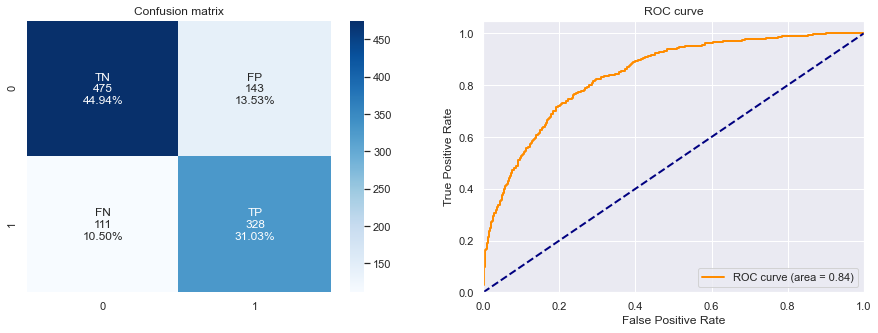

(0.759697256385998,
 0.6963906581740976,
 0.7890365448504982,
 0.7471526195899773,
 0.7890365448504982,
 0.720879120879121,
 0.7890365448504982,
 0.8418183426587347)

In [34]:
print(X_train.shape)
print(X_test.shape)
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

#model_eval('sgd', X_train, y_train, X_test, y_test, print_c = True)
model_eval('mlp', X_res, y_res, X_test, y_test, print_c = True)
# acc, precision, precision_neg, recall, recall_neg, f1, f1_neg, roc_auc



# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X_train, y_train)
# clf = RandomForestClassifier(n_estimators=1000,n_jobs=-1).fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# y_prob = clf.predict_proba(X_test)[:,1]
# getTestMetrics(y_test, y_pred, y_prob, full_metrics = True, print_charts= True)
# tree.plot_tree(clf) 


In [65]:
results_dir

'results/2018/embeddings/ml/'

# Run experiments

In [45]:
def runExperimentsTrainTest(experiments, models):
    total_start_time = time.time()
    
    for experiment in experiments:
        
        #if the experiment was already made, continue
        #results_dir = 'results/2018/viral_2/ml/'
        experiment_file = experiment + '.csv'
        filepath = results_dir + experiment_file
        print(filepath)
        list_files = os.listdir(results_dir)
        if experiment_file in list_files:
            continue        
        
        #measure experiment time
        start_time = time.time()
        
        # train-test split
        if 'pre_processed' in experiment:
            X_texts = pro_texts
        else:
            X_texts = semi_pro_texts
        texts_train, texts_test, y_train, y_test = train_test_split(X_texts, y, 
                                                                    test_size=0.2, stratify = y, 
                                                                    random_state=42)        
        # features
        vectorizer = defineVectorizing(experiment)
        X_train,X_test = vectorizing(vectorizer,texts_train,texts_test)
        vocab = X_train.shape[1]
        
        # metrics
        accuracy_score = []
        precision_score = []
        precision_score_neg = []
        recall_score = []
        recall_score_neg = []
        f1_score = []
        f1_score_neg = []
        auc_score = []
        
        experiment_time = time.time()
        for model in models:
            acc, precision, precision_neg, recall, recall_neg, f1, f1_neg, roc_auc = model_eval(model,
                                                                                                X_train,
                                                                                                y_train,
                                                                                                X_test,
                                                                                                y_test)
            accuracy_score.append(acc)
            precision_score.append(precision)
            precision_score_neg.append(precision_neg)
            recall_score.append(recall)
            recall_score_neg.append(recall_neg)
            f1_score.append(f1)
            f1_score_neg.append(f1_neg)
            auc_score.append(roc_auc)
            
        df_metrics = buildResults(models,vocab,accuracy_score,
                                  precision_score,precision_score_neg,
                                  recall_score,recall_score_neg,
                                  f1_score,f1_score_neg,auc_score)


            
        df_metrics.to_csv(filepath,index=False)
        end_time = time.time()
        ellapsed_time = end_time - start_time
        print(experiment + ' time (minutes):', ellapsed_time/60)
    
    total_end_time = time.time()
    total_ellapsed_time = total_end_time - total_start_time
    print()
    print('---------------------')
    print()
    print('TOTAL time (minutes):', total_ellapsed_time/60)

In [231]:
runExperimentsTrainTest(experiments,models)

results/2018/k-fold-50/ml/tfidf-unigram_bigram_trigram-pre_processed.csv
AUC:  0.9042508417508417
AUC:  0.9002946127946128
AUC:  0.9157407407407407
AUC:  0.8644149831649831
AUC:  0.9200547138047137
AUC:  0.8797558922558922
Iteration 1, loss = 0.65601312
Validation score: 0.696000
Iteration 2, loss = 0.44255506
Validation score: 0.728000
Iteration 3, loss = 0.25957247
Validation score: 0.752000
Iteration 4, loss = 0.15136436
Validation score: 0.744000
Iteration 5, loss = 0.09772508
Validation score: 0.768000
Iteration 6, loss = 0.06926189
Validation score: 0.784000
Iteration 7, loss = 0.05447132
Validation score: 0.784000
Iteration 8, loss = 0.04543239
Validation score: 0.776000
Iteration 9, loss = 0.03826862
Validation score: 0.776000
Iteration 10, loss = 0.03371183
Validation score: 0.776000
Iteration 11, loss = 0.03021158
Validation score: 0.776000
Iteration 12, loss = 0.02610462
Validation score: 0.776000
Validation score did not improve more than tol=0.001000 for 5 consecutive epoc

# K-Folds

In [110]:
def kFoldsEvaluate(model,experiment,X,y):
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    auc_list = []
    fpr_list = []
    vocabs = []
    
    skf = StratifiedKFold(n_splits=5)
    i=0
    for train_index, test_index in skf.split(X, y):
        i+=1
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        if 'oversampling' in experiment:
            ros = RandomOverSampler(random_state=42)
            X_train, y_train = ros.fit_resample(X_train, y_train)

        # model
        vocab = X_train.shape[1]
        print(model + str(i))
        acc, precision, precision_neg, recall, recall_neg, f1, f1_neg, roc_auc = model_eval(model,
                                                                                                    X_train,
                                                                                                    y_train,
                                                                                                    X_test,
                                                                                                    y_test)
        vocabs.append(vocab)
        accuracy_list.append(acc)
        precision_list.append(precision)
        recall_list.append(recall)    
        f1_list.append(f1)    
        auc_list.append(roc_auc)
        fpr_list.append(1-recall_neg)

    vocab_mean = np.floor(np.array(vocabs).mean())
    accuracy_mean = np.array(accuracy_list).mean()
    precision_mean = np.array(precision_list).mean()
    recall_mean = np.array(recall_list).mean()
    f1_mean = np.array(f1_list).mean()
    auc_mean = np.array(auc_list).mean()
    fpr_mean = np.array(fpr_list).mean()
    
    accuracy_std = np.array(accuracy_list).std()
    precision_std = np.array(precision_list).std()
    recall_std = np.array(recall_list).std()
    f1_std = np.array(f1_list).std()
    auc_std = np.array(auc_list).std()
    fpr_std = np.array(fpr_list).std()
    
    return vocab_mean, accuracy_mean, accuracy_std, precision_mean,precision_std, recall_mean, recall_std, f1_mean, f1_std, auc_mean, auc_std, fpr_mean, fpr_std
#kFoldsEvaluate(model,experiment,X_texts)

In [84]:
def buildResultsKFold(models,vocab,metrics_list):
    df_metrics = pd.DataFrame({'model':models,
                               'vocab':[vocab]*len(models),
                               'acc_mean': metrics_list[0],
                               'acc_std': metrics_list[1],
                               'pre_mean': metrics_list[2],
                               'pre_std': metrics_list[3],
                               'rec_mean': metrics_list[4],
                               'rec_std': metrics_list[5],
                               'f1_mean': metrics_list[6],
                               'f1_std': metrics_list[7],
                               'auc_mean': metrics_list[8],
                               'auc_std': metrics_list[9],
                               'fpr_mean': metrics_list[10],
                               'fpr_std': metrics_list[11]
                              })    
#     df_metrics['precision avg'] = (df_metrics['precision 1'] + df_metrics['precision 0'])/2
#     df_metrics['recall avg'] = (df_metrics['recall 1'] + df_metrics['recall 0'])/2
#     df_metrics['f1 avg'] = (df_metrics['f1 score 1'] + df_metrics['f1 score 0'])/2
#     df_metrics['fpr'] = 1 - df_metrics['recall 0']
    return df_metrics

In [88]:
def runExperimentsKFolds(experiments, models, X_pro, X_semi, y):
    total_start_time = time.time()
    
    for experiment in experiments:
        
        #if the experiment was already made, continue
        #results_dir = 'results/2018/k-fold/ml/'
        experiment_file = experiment + '.csv'
        filepath = results_dir + experiment_file
        print(filepath)
        list_files = os.listdir(results_dir)
        if experiment_file in list_files:
            continue        
        
        #measure experiment time
        start_time = time.time()
        
        # train-test split
        if 'pre_processed' in experiment:
            X = X_pro
        else:
            X = X_semi
        
        # metrics
        acc_mean = []
        acc_std = []
        pre_mean = []
        pre_std = []
        rec_mean = []
        rec_std = []
        f1_score_mean = []
        f1_score_std = []
        auc_score_mean = []
        auc_score_std = []
        fpr_score_mean = []
        fpr_score_std = []       
        
        
        
        experiment_time = time.time()
        for model in models:
            vocab, accuracy_mean, accuracy_std, precision_mean,precision_std, recall_mean, recall_std, f1_mean, f1_std, auc_mean, auc_std, fpr_mean, fpr_std = kFoldsEvaluate(model,experiment,X,y)
            
            acc_mean.append(accuracy_mean)
            acc_std.append(accuracy_std)
            pre_mean.append(precision_mean)
            pre_std.append(precision_std)
            rec_mean.append(recall_mean)
            rec_std.append(recall_std)
            f1_score_mean.append(f1_mean)
            f1_score_std.append(f1_std)
            auc_score_mean.append(auc_mean)
            auc_score_std .append(auc_std)
            fpr_score_mean.append(fpr_mean)
            fpr_score_std.append(fpr_std)
            
             

        metrics_list = [acc_mean,
                        acc_std,
                        pre_mean,
                        pre_std,
                        rec_mean,
                        rec_std,
                        f1_score_mean,
                        f1_score_std,
                        auc_score_mean,
                        auc_score_std,
                        fpr_score_mean,
                        fpr_score_std]
        
        end_time = time.time()
        ellapsed_time = end_time - start_time
        print(experiment + ' time (minutes):', ellapsed_time/60)
        
        # save results
        df_metrics = buildResultsKFold(models,vocab,metrics_list)            
        df_metrics.to_csv(filepath,index=False)
        

    
    total_end_time = time.time()
    total_ellapsed_time = total_end_time - total_start_time
    print()
    print('---------------------')
    print()
    print('TOTAL time (minutes):', total_ellapsed_time/60) 


In [120]:
experiments
#models

['word2vec',
 'word2vec_pre_processed',
 'word2vec_oversampling',
 'word2vec_pre_processed_oversampling']

In [74]:
X_pro = vectorize_corpus(w2v,pro_texts)
X_semi = vectorize_corpus(w2v,semi_pro_texts)

<ipython-input-49-7c256811b14f>:23: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vec = model[word]


In [121]:
y = np.array(y)
runExperimentsKFolds(experiments, models, X_pro, X_semi, y)

results/2018/embeddings/ml/word2vec.csv
results/2018/embeddings/ml/word2vec_pre_processed.csv
results/2018/embeddings/ml/word2vec_oversampling.csv
lr1
AUC:  0.7800694890123264
lr2
AUC:  0.728092679007158
lr3
AUC:  0.7538610109766976
lr4
AUC:  0.8006501979344053
lr5
AUC:  0.7790744927664731
lsvm1
lsvm2
lsvm3
lsvm4
lsvm5
sgd1
sgd2
sgd3
sgd4
sgd5
svm1
AUC:  0.8522510161477119
svm2
AUC:  0.8049387767137728
svm3
AUC:  0.8325924615373274
svm4
AUC:  0.8530456834081576
svm5
AUC:  0.8663958712003664
knn1
AUC:  0.7796471699087495
knn2
AUC:  0.732333340705192
knn3
AUC:  0.7767727477128809
knn4
AUC:  0.7693492860354881
knn5
AUC:  0.7833414608916671
rf1
AUC:  0.8369221236196251
rf2
AUC:  0.8101433089324811
rf3
AUC:  0.8269898489506159
rf4
AUC:  0.8474301700687793
rf5
AUC:  0.8583588243117436
gb1
AUC:  0.8291507144385185
gb2
AUC:  0.7767100869142136
gb3
AUC:  0.8096659810838108
gb4
AUC:  0.8370229485960295
gb5
AUC:  0.8593526030352735
mlp1
Iteration 1, loss = 0.59492959
Validation score: 0.735354
It

Iteration 26, loss = 0.18858293
Validation score: 0.793939
Iteration 27, loss = 0.18119798
Validation score: 0.787879
Iteration 28, loss = 0.17277622
Validation score: 0.804040
Iteration 29, loss = 0.16863922
Validation score: 0.793939
Iteration 30, loss = 0.16027063
Validation score: 0.802020
Iteration 31, loss = 0.15178273
Validation score: 0.787879
Validation score did not improve more than tol=0.001000 for 5 consecutive epochs. Stopping.
AUC:  0.8384936344000413
mlp5
Iteration 1, loss = 0.62242893
Validation score: 0.719192
Iteration 2, loss = 0.53100043
Validation score: 0.747475
Iteration 3, loss = 0.49858164
Validation score: 0.761616
Iteration 4, loss = 0.47256397
Validation score: 0.759596
Iteration 5, loss = 0.45004307
Validation score: 0.777778
Iteration 6, loss = 0.43243672
Validation score: 0.775758
Iteration 7, loss = 0.41437279
Validation score: 0.773737
Iteration 8, loss = 0.39855575
Validation score: 0.777778
Iteration 9, loss = 0.37879314
Validation score: 0.775758
It

Iteration 4, loss = 0.46380443
Validation score: 0.800000
Iteration 5, loss = 0.43825881
Validation score: 0.802020
Iteration 6, loss = 0.41736342
Validation score: 0.800000
Iteration 7, loss = 0.39320603
Validation score: 0.816162
Iteration 8, loss = 0.37202705
Validation score: 0.806061
Iteration 9, loss = 0.35133614
Validation score: 0.816162
Iteration 10, loss = 0.33018603
Validation score: 0.830303
Iteration 11, loss = 0.31222666
Validation score: 0.826263
Iteration 12, loss = 0.29251399
Validation score: 0.806061
Iteration 13, loss = 0.27823295
Validation score: 0.818182
Iteration 14, loss = 0.26443471
Validation score: 0.832323
Iteration 15, loss = 0.24575838
Validation score: 0.824242
Iteration 16, loss = 0.23197806
Validation score: 0.834343
Iteration 17, loss = 0.21813662
Validation score: 0.838384
Iteration 18, loss = 0.20875605
Validation score: 0.840404
Iteration 19, loss = 0.19715227
Validation score: 0.824242
Iteration 20, loss = 0.18743569
Validation score: 0.834343
Ite

## Results

In [122]:
results_dir = 'results/' + str(base) + '/' + subset + '/ml/'
results_dir

'results/2018/embeddings/ml/'

In [123]:
experiment = experiments[-1]
filepath = results_dir + experiment + '.csv'
print(filepath)

results/2018/embeddings/ml/word2vec_pre_processed_oversampling.csv


In [124]:
df_metrics = pd.read_csv(filepath)
df_metrics['vocab'] = df_metrics['vocab'].astype('int64') 
# df_metrics['fpr'] = 1 - df_metrics['recall 0']
# df_met = df_metrics.rename(columns={"precision 1": "pre", "recall 1": "rec", "f1 score 1":"f1-score"})
pd.set_option('precision', 3)
# df_met[['vocab','model','fpr','pre','rec', 'f1-score']].style.background_gradient(cmap='binary')
cm = sns.light_palette("gray", as_cmap=True)
#[['model','vocab','fpr_mean','pre_mean','rec_mean','f1_mean']]
df_metrics[['model', 'vocab', 'acc_mean', 'pre_mean', 'rec_mean', 'f1_mean', 'auc_mean', 'fpr_mean']].style.background_gradient(cmap=cm)

,model,vocab,acc_mean,pre_mean,rec_mean,f1_mean,auc_mean,fpr_mean
0,lr,100,0.713,0.637,0.722,0.676,0.778,0.258
1,lsvm,100,0.716,0.639,0.729,0.681,0.000,0.257
2,sgd,100,0.659,0.598,0.593,0.590,0.000,0.295
3,svm,100,0.771,0.709,0.765,0.735,0.853,0.201
4,knn,100,0.674,0.572,0.857,0.686,0.775,0.339
5,rf,100,0.766,0.768,0.625,0.688,0.839,0.188
6,gb,100,0.749,0.688,0.728,0.707,0.826,0.219
7,mlp,100,0.757,0.703,0.721,0.711,0.828,0.210


In [125]:
df_metrics.columns

Index(['model', 'vocab', 'acc_mean', 'acc_std', 'pre_mean', 'pre_std',
       'rec_mean', 'rec_std', 'f1_mean', 'f1_std', 'auc_mean', 'auc_std',
       'fpr_mean', 'fpr_std'],
      dtype='object')

In [126]:
from IPython.display import display

In [127]:
def meanStdToString(mean,std):
    plusminus = ' ± '
    mean = str(mean)[0:5]
    std = str(std)[0:4]
    return str(mean)+plusminus+str(std)    

def highlight_max(x):
    if (x == df_metrics['Model']).all() or (x == df_metrics['vocab']).all():
        return ['' for v in x]
    elif (x == df_metrics['FPR']).all():
        return ['font-weight: bold' if v == x.min() else '' for v in x]
        
    return ['font-weight: bold' if v == x.max() else '' for v in x]



# experiment = experiments[i]
# print(str(i) + ' ' + experiment)
# i+=1

for filename in os.listdir(results_dir):
    experiment = filename.replace('.csv','')
    file_path = results_dir + filename
    print(file_path)

    df_metrics = pd.read_csv(file_path)    
    df_metrics['Model'] = [x.upper() for x in df_metrics['model']]
    df_metrics['ACC'] = df_metrics.apply(lambda x: meanStdToString(x['acc_mean'], x['acc_std']),axis=1)
    df_metrics['PRE'] = df_metrics.apply(lambda x: meanStdToString(x['pre_mean'], x['pre_std']),axis=1)
    df_metrics['REC'] = df_metrics.apply(lambda x: meanStdToString(x['rec_mean'], x['rec_std']),axis=1)
    df_metrics['F1'] = df_metrics.apply(lambda x: meanStdToString(x['f1_mean'], x['f1_std']),axis=1)
    df_metrics['FPR'] = df_metrics.apply(lambda x: meanStdToString(x['fpr_mean'], x['fpr_std']),axis=1)

    styles = [dict(selector="caption", 
        props=[("text-align", "center"),
        ("font-size", "120%"),
        ("color", 'black'),
        ("font-weight", "bold")])] 

    style = df_metrics[['Model','FPR','PRE','REC','F1']].style.apply(highlight_max)
    title = experiment.upper() + '. Features: ' + str(df_metrics.iloc[0].values[1])
    sheet = experiment.upper() + ' ' + str(df_metrics.iloc[0].values[1])
    sheet = sheet.replace('PRE_PROCESSED','PRE')
    sheet = sheet.replace('GRAM','')
    print(title)
    style = style.set_caption(title).set_table_styles(styles)
    #print(style.to_latex(index=False))
    
    print()
    display(style)
    print()
    #style.to_excel("results/2018/k-fold/plots/" + title + ".xlsx") 

results/2018/embeddings/ml/word2vec.csv
WORD2VEC. Features: 100.0



,Model,FPR,PRE,REC,F1
0,LR,0.244 ± 0.01,0.658 ± 0.02,0.606 ± 0.02,0.631 ± 0.02
1,LSVM,0.241 ± 0.01,0.664 ± 0.03,0.605 ± 0.01,0.633 ± 0.02
2,SGD,0.281 ± 0.03,0.619 ± 0.04,0.425 ± 0.23,0.457 ± 0.16
3,SVM,0.205 ± 0.02,0.713 ± 0.03,0.707 ± 0.03,0.709 ± 0.02
4,KNN,0.315 ± 0.02,0.586 ± 0.01,0.827 ± 0.01,0.686 ± 0.01
5,RF,0.192 ± 0.00,0.774 ± 0.02,0.580 ± 0.02,0.662 ± 0.01
6,GB,0.212 ± 0.01,0.708 ± 0.03,0.667 ± 0.03,0.686 ± 0.02
7,MLP,0.223 ± 0.01,0.688 ± 0.02,0.653 ± 0.09,0.668 ± 0.05



results/2018/embeddings/ml/word2vec_oversampling.csv
WORD2VEC_OVERSAMPLING. Features: 100.0



,Model,FPR,PRE,REC,F1
0,LR,0.269 ± 0.02,0.624 ± 0.02,0.725 ± 0.02,0.670 ± 0.02
1,LSVM,0.267 ± 0.02,0.626 ± 0.02,0.734 ± 0.02,0.675 ± 0.01
2,SGD,0.320 ± 0.05,0.583 ± 0.04,0.711 ± 0.13,0.631 ± 0.04
3,SVM,0.217 ± 0.02,0.686 ± 0.03,0.772 ± 0.03,0.725 ± 0.02
4,KNN,0.348 ± 0.03,0.566 ± 0.01,0.861 ± 0.00,0.683 ± 0.01
5,RF,0.196 ± 0.01,0.753 ± 0.03,0.607 ± 0.02,0.672 ± 0.02
6,GB,0.225 ± 0.02,0.680 ± 0.03,0.721 ± 0.03,0.699 ± 0.02
7,MLP,0.227 ± 0.01,0.676 ± 0.01,0.730 ± 0.05,0.701 ± 0.02



results/2018/embeddings/ml/word2vec_pre_processed.csv
WORD2VEC_PRE_PROCESSED. Features: 100.0



,Model,FPR,PRE,REC,F1
0,LR,0.236 ± 0.02,0.671 ± 0.03,0.616 ± 0.02,0.642 ± 0.02
1,LSVM,0.233 ± 0.02,0.676 ± 0.03,0.625 ± 0.02,0.649 ± 0.02
2,SGD,0.276 ± 0.00,0.610 ± 0.00,0.596 ± 0.09,0.599 ± 0.04
3,SVM,0.192 ± 0.01,0.738 ± 0.03,0.699 ± 0.04,0.717 ± 0.02
4,KNN,0.308 ± 0.03,0.591 ± 0.02,0.827 ± 0.02,0.689 ± 0.02
5,RF,0.195 ± 0.01,0.768 ± 0.03,0.578 ± 0.03,0.658 ± 0.02
6,GB,0.212 ± 0.01,0.706 ± 0.02,0.670 ± 0.03,0.687 ± 0.02
7,MLP,0.212 ± 0.01,0.701 ± 0.02,0.692 ± 0.03,0.696 ± 0.02



results/2018/embeddings/ml/word2vec_pre_processed_oversampling.csv
WORD2VEC_PRE_PROCESSED_OVERSAMPLING. Features: 100.0



,Model,FPR,PRE,REC,F1
0,LR,0.258 ± 0.02,0.636 ± 0.02,0.721 ± 0.02,0.676 ± 0.01
1,LSVM,0.256 ± 0.02,0.638 ± 0.02,0.729 ± 0.01,0.680 ± 0.01
2,SGD,0.294 ± 0.04,0.597 ± 0.05,0.593 ± 0.07,0.590 ± 0.03
3,SVM,0.201 ± 0.02,0.709 ± 0.03,0.765 ± 0.04,0.735 ± 0.02
4,KNN,0.338 ± 0.02,0.572 ± 0.01,0.856 ± 0.01,0.686 ± 0.01
5,RF,0.188 ± 0.01,0.768 ± 0.02,0.624 ± 0.03,0.688 ± 0.02
6,GB,0.219 ± 0.02,0.687 ± 0.03,0.728 ± 0.03,0.706 ± 0.02
7,MLP,0.209 ± 0.01,0.702 ± 0.02,0.720 ± 0.01,0.711 ± 0.00


# Best results

In [128]:
# best results analysis
df_best = pd.DataFrame(columns=df_metrics.columns)

#iterates over files
exp = []
metric = 'f1_mean'
for filename in os.listdir(results_dir):
    if 'max_features' in filename:
        continue
    exp.append(str(filename).replace('.csv',''))
    file_path = results_dir + filename
    df_temp = pd.read_csv(file_path)
    best_ix = df_temp[metric].argmax() #f1 score
    best = df_temp.iloc[best_ix]
    df_best = df_best.append(best)
    #df_best = df_best.append(df_temp[df_temp['model']=='knn'])
    
df_best['vocab'] = df_best['vocab'].astype('int64')    
df_best['experiment'] = exp
cols = df_best.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_best = df_best[cols]

df_best = df_best.sort_values(by=metric,ascending=False)
df_best = df_best.reset_index()
df_best = df_best.drop(columns = ['index'])
df_best[['experiment','model','vocab','fpr_mean','pre_mean','rec_mean','f1_mean']].style.background_gradient(cmap='Blues')

,experiment,model,vocab,fpr_mean,pre_mean,rec_mean,f1_mean
0,word2vec_pre_processed_oversampling,svm,100,0.201,0.709,0.765,0.735
1,word2vec_oversampling,svm,100,0.218,0.686,0.772,0.726
2,word2vec_pre_processed,svm,100,0.192,0.738,0.700,0.717
3,word2vec,svm,100,0.206,0.713,0.707,0.709


In [129]:
# best results analysis
df_best = pd.DataFrame(columns=df_metrics.columns)
df_list = []

#iterates over files
exp = []
metric = 'f1_mean'
for filename in os.listdir(results_dir):
    if 'max_features' in filename:
        continue
    exp.append(str(filename).replace('.csv',''))
    name_exp = (str(filename).replace('.csv',''))
    file_path = results_dir + filename
    df_temp = pd.read_csv(file_path)
    df_temp['experiment'] = [name_exp]*len(df_temp)
    df_list.append(df_temp)
    
df_best = pd.concat(df_list)
df_best['vocab'] = df_best['vocab'].astype('int64')    
cols = df_best.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_best = df_best[cols]
df_best = df_best.sort_values(by=metric,ascending=False)
df_best = df_best.reset_index()
df_best = df_best.drop(columns = ['index'])
df_best['feature/model'] = df_best['experiment'] +['_']*len(df_best['model']) + df_best['model']
df_best[['feature/model','vocab','fpr_mean','pre_mean','rec_mean','f1_mean']].style.background_gradient(cmap='Blues')

,feature/model,vocab,fpr_mean,pre_mean,rec_mean,f1_mean
0,word2vec_pre_processed_oversampling_svm,100,0.201,0.709,0.765,0.735
1,word2vec_oversampling_svm,100,0.218,0.686,0.772,0.726
2,word2vec_pre_processed_svm,100,0.192,0.738,0.700,0.717
3,word2vec_pre_processed_oversampling_mlp,100,0.210,0.703,0.721,0.711
4,word2vec_svm,100,0.206,0.713,0.707,0.709
5,word2vec_pre_processed_oversampling_gb,100,0.219,0.688,0.728,0.707
6,word2vec_oversampling_mlp,100,0.227,0.676,0.731,0.701
7,word2vec_oversampling_gb,100,0.225,0.680,0.722,0.700
8,word2vec_pre_processed_mlp,100,0.213,0.702,0.693,0.697
9,word2vec_pre_processed_knn,100,0.309,0.592,0.828,0.690


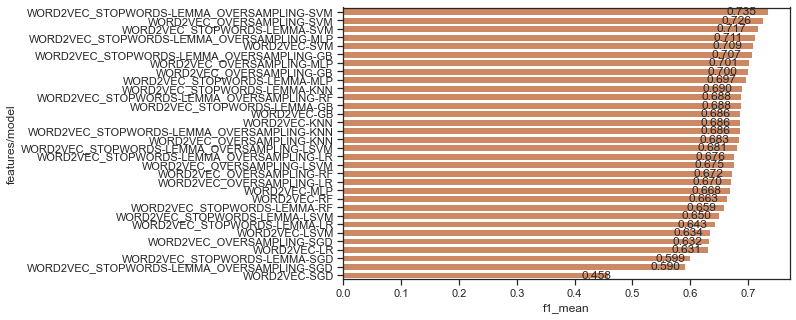

In [130]:
def adjustExp(string):
    string = string.upper()
    string = string.replace('UNIGRAM','1')
    string = string.replace('_BIGRAM',',2')
    string = string.replace('_TRIGRAM',',3')
    string = string.replace('PRE_PROCESSED','STOPWORDS-LEMMA')
    return string

metric = 'f1_mean'
df_best['features/model'] = df_best['experiment'] +['-']*len(df_best['model']) + df_best['model']
df_best['features/model'] = [adjustExp(t) for t in df_best['features/model']]
df_best = df_best.sort_values(by=metric,ascending=False)

keys = df_best['features/model']
values = df_best[metric]
sns.set(style="ticks")

plt.figure(figsize=(8, 5))
g = sns.barplot(x = values,y = keys,color='C1')

for p in g.patches:
    g.annotate(format(p.get_width(), '.3f'), (p.get_width()*0.90, 
                                               p.get_y() + p.get_height()/2.), ha = 'center', 
               va = 'center', xytext = (15, 0), textcoords = 'offset points')
    
# for p in g.patches:
#     g.annotate(format(p.get_width(), '.3f'), (p.get_y() + p.get_height() / 2., 
#                                                p.get_width()), ha = 'center', 
#                va = 'center', xytext = (0, 5), textcoords = 'offset points')

In [45]:
df_best[['features/model','vocab','fpr_mean','pre_mean','rec_mean','f1_mean']][0:10] #.to_string(index=False))

,features/model,vocab,fpr_mean,pre_mean,rec_mean,f1_mean
0,tfidf-unigram_bigram-pre_processed-lsvm,129745,0.197,0.717,0.750,0.733
1,tfidf-unigram_bigram_trigram-pre_processed-lsvm,261665,0.211,0.692,0.778,0.733
2,tfidf-unigram_bigram_trigram-sgd,384783,0.212,0.692,0.777,0.731
3,bow-unigram_bigram-pre_processed-mlp,129745,0.173,0.781,0.679,0.726
4,tfidf-unigram_bigram-mlp,156182,0.197,0.722,0.731,0.726
5,bow-unigram-pre_processed-mlp,19455,0.182,0.760,0.685,0.720
6,bow-unigram_bigram_trigram-pre_processed-mlp,261665,0.172,0.795,0.657,0.718
7,bow-unigram_bigram_trigram-sgd,384783,0.198,0.725,0.710,0.716
8,bow-unigram-lr,23422,0.184,0.761,0.677,0.716
9,tfidf-unigram-lsvm,23422,0.197,0.726,0.704,0.714


In [52]:
dif = values.max()-values.min()
dif=dif*100/values.min()
print('%.3f'%dif)
values

3.224


0     0.733
1     0.733
2     0.731
3     0.726
4     0.726
5     0.720
6     0.718
7     0.716
8     0.716
9     0.714
10    0.711
11    0.710
Name: f1_mean, dtype: float64

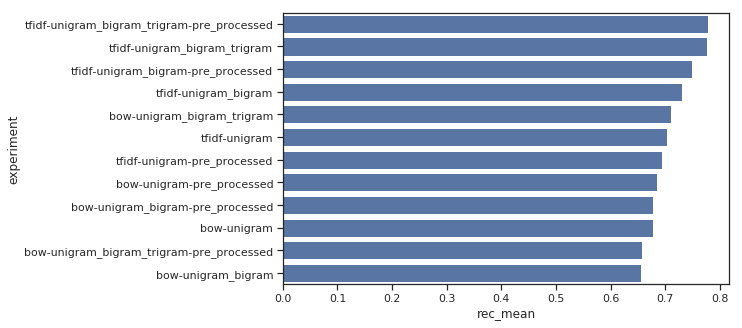

In [70]:
metric = 'rec_mean'
df_best = df_best.sort_values(by=metric,ascending=False)
x = df_best['experiment']
y = df_best[metric]
plt.figure(figsize=(8, 5))
sns.barplot(y,x,color='C0')

In [71]:
df_best['model'].value_counts()

mlp     4
lsvm    4
lr      2
sgd     2
Name: model, dtype: int64

In [72]:
print('total experiments:',len(df_best)*len(df_metrics))

total experiments: 108


# Error examples with best classifier

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       618
           1       0.85      0.80      0.83       660

    accuracy                           0.83      1278
   macro avg       0.83      0.83      0.83      1278
weighted avg       0.83      0.83      0.83      1278

Total test data: 1278
Negative in test data: 618
Positive in test data: 660
False negative:  131
False positive:  91


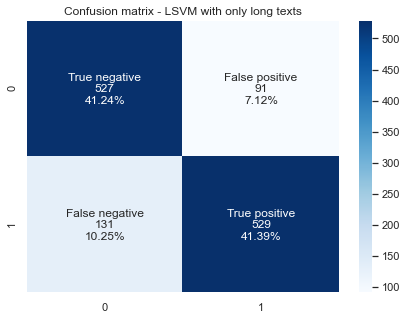

In [48]:
# 1-1 = 0 true positive
# 0-0 = 0 true negative
# 1-0 = 1 false negative
# 0-1 = -1 false positive
#clf = MLPClassifier(verbose=True, early_stopping= True, batch_size=64, n_iter_no_change = 5, tol = 1e-3).fit(X_train, y_train)
clf = LinearSVC(dual=False).fit(X_train, y_train)
y_pred = clf.predict(X_test)
#y_prob = clf.predict_proba(X_test)[:,1]
#getTestMetrics(y_test, y_pred, full_metrics = False, print_charts=True)

print(metrics.classification_report(y_test, y_pred))
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
group_names = ['True negative','False positive','False negative','True positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(7, 5))
#plt.subplot(121)
plt.title('Confusion matrix - LSVM with only long texts')
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


y_fails = y_test - y_pred
N = [index for index, value in enumerate(y_test) if value == 0]
P = [index for index, value in enumerate(y_test) if value == 1]
FN = [index for index, value in enumerate(y_fails) if value == 1]
FP = [index for index, value in enumerate(y_fails) if value == -1]

# 1 + 1 = 2 TP
# 0 + 0 = 0 TN
y_sucess = y_test + y_pred
TN = [index for index, value in enumerate(y_sucess) if value == 0]
TP = [index for index, value in enumerate(y_sucess) if value == 2]

print('Total test data:', len(y_pred))
print('Negative in test data:',len(N))
print('Positive in test data:',len(P))
print('False negative: ',len(FN))
print('False positive: ',len(FP))

In [49]:
full_texts_test = list(full_texts_test)

In [50]:
texts_N = [full_texts_test[n] for n in N]
texts_P = [full_texts_test[p] for p in P]
texts_FN = [full_texts_test[fn] for fn in FN]
texts_FP = [full_texts_test[fp] for fp in FP]
texts_TN = [full_texts_test[fn] for fn in TN]
texts_TP = [full_texts_test[fp] for fp in TP]

### False negative

In [51]:
for fn in texts_FN:
    print('***')
    print(fn)
    print('***')

***
✴Janaína Paschoal denuncia: A imprensa não está falando a verdade sobre o atentado sofrido pelo Bolsonaro.✴

✳A pessoa que atacou o Bolsonaro é um petista!✳

Todos tem que assistir e compartilhar sobre a verdade e MANIPULAÇÃO da IMPRENSA e REDES DE TELEVISÃO.
👇👇👇👇👇👇👇👇👇
***
***
Dinheiro voltando pra alimentar campanha  do PT
***
***
Gente, fomos reclassificados, olha q legal, nao somos mais da terceira idade, nem idosos! 

OMS reclassifica conceito de Jovem / Idoso
Anteriormente, uma Instituição Inglesa  (Friendly  Society Act) definiu, em 1875, que "Idosos" eram indivíduos a partir de 50 anos.....

Diante da evolução da qualidade dos alimentos, das atividades físicas, hoje praticadas pela maioria das pessoas, e do avanço do número de pessoas que escolheram melhorar a alimentação, o que deu mais qualidade, e aumentou a expectativa de vida das pessoas, a *Organização Mundial de Saúde (OMS)*, fez uma nova avaliação do conceito de *ser Jovem, ter Meia Idade, e, ser Velho*.....

01)  *M

### False positives

In [52]:
for fp in texts_FP:
    print()
    print('***')
    print(fp)
    print('***')
    print()


***
LIMPEZA ATUALIZADA: 
Suplicy ✖
Lindenbergh ✖
Dilma ✖
Pimentel ✖
Rosseto ✖
Requiao ✖
Cristovam Buarque ✖
Beto Richa ✖
Jean Wyllis ✖
Vanessa Graziottin ✖
Edison lobao ✖
Vicentinho ✖
Sarney filho ✖
Jorge Viana ✖
Roseana Sarney ✖

And counting!
***


***
Quando o PT dissemina fake news, o G1 chama de "acusação equivocada". Pára que tá feio Globo! Imprensa desmoralizada!!!
***


***
Taxista questiona ao vivo de maneira brilhante o jornalista Ricardo Boechat sobre esse dito "apoio popular" a Lula. Vale a pena ouvir!
***


***
*ALCKMIN PROCESSADO POR CAIXA 2 DA ODEBRECHT*

O MP resolveu processar Geraldo Alckmin pelos 10 milhões de reais que ele recebeu do departamento de propinas da Odebrecht.

“O Ministério Público do Estado de São Paulo ajuizou uma ação de improbidade administrativa contra o ex-governador de São Paulo e candidato à Presidência da República Geraldo Alckmin (PSDB) por supostamente ter recebido R$ 10 milhões via caixa 2 da Odebrecht para campanhas eleitorais.

O MP pede 

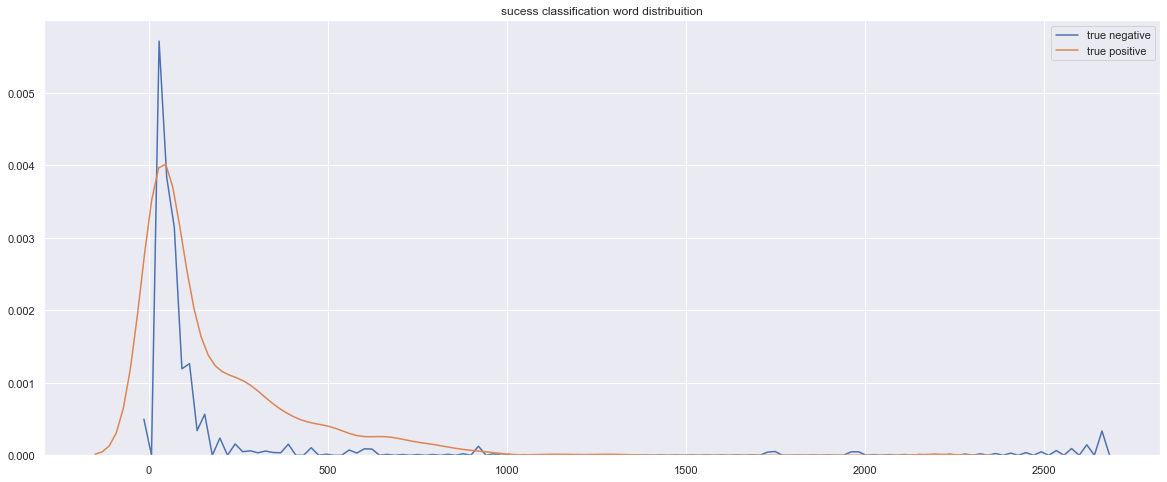

In [53]:
fn_tokens = np.array([len(t.split()) for t in texts_FN])
fp_tokens = np.array([len(t.split()) for t in texts_FP])
tn_tokens = np.array([len(t.split()) for t in texts_TN])
tp_tokens = np.array([len(t.split()) for t in texts_TP])
p_tokens = np.array([len(t.split()) for t in texts_P])
n_tokens = np.array([len(t.split()) for t in texts_N])

plt.figure(figsize=(20, 8))
plt.title('sucess classification word distribuition')
sns.distplot(tn_tokens, hist = False, kde = True, label = 'true negative')
sns.distplot(tp_tokens, hist = False, kde = True, label = 'true positive')
plt.show()


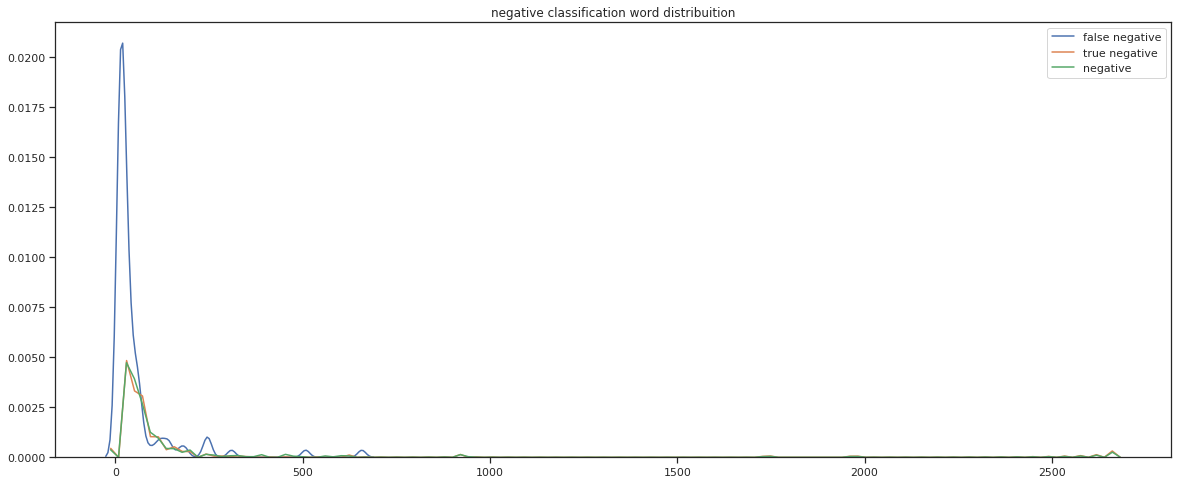

In [84]:
plt.figure(figsize=(20, 8))
plt.title('negative classification word distribuition')
sns.distplot(fn_tokens, hist = False, kde = True, label = 'false negative')
sns.distplot(tn_tokens, hist = False, kde = True, label = 'true negative')
sns.distplot(n_tokens, hist = False, kde = True, label = 'negative')
plt.show()

Negative class classification was very biased by size

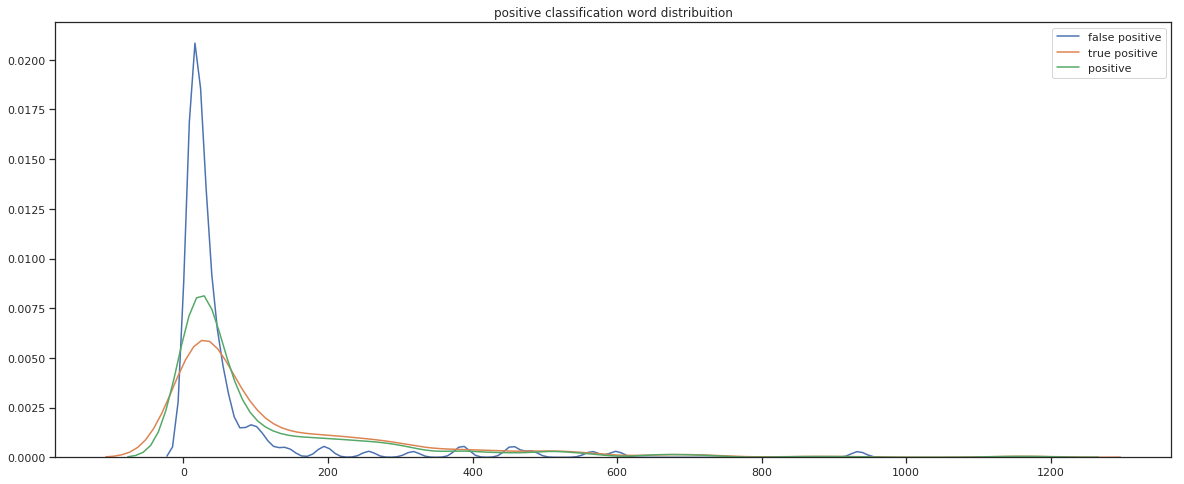

In [85]:
plt.figure(figsize=(20, 8))
plt.title('positive classification word distribuition')
sns.distplot(fp_tokens, hist = False, kde = True, label = 'false positive')
sns.distplot(tp_tokens, hist = False, kde = True, label = 'true positive')
sns.distplot(p_tokens, hist = False, kde = True, label = 'positive')
plt.show()

In [86]:
print()
print('false positive average tokens:',fp_tokens.mean())
print('true positive average tokens:',tp_tokens.mean())
print('positive average tokens:',p_tokens.mean())
print()
print('false negative average tokens:',fn_tokens.mean())
print('true negative average tokens:',tn_tokens.mean())
print('negative average tokens:',n_tokens.mean())


false positive average tokens: 65.43262411347517
true positive average tokens: 130.874251497006
positive average tokens: 112.2870159453303

false negative average tokens: 53.161904761904765
true negative average tokens: 49.42557651991614
negative average tokens: 53.077669902912625


In [87]:
fn = ['false negative']*len(texts_FN)
fp = ['false positive']*len(texts_FP)

errors_text = texts_FN + texts_FP
errors_label = fn+fp
df_errors = pd.DataFrame({'text':errors_text,'error':errors_label})
len(df_errors)
#df_errors.to_csv('results/'+base+'/'+subset+'/errors/errors-mlp.csv')

246

In [88]:
len(df_errors)

246

In [120]:
df_errors = pd.read_csv('results/2018/k-fold/errors/errors-lsvm-labels.csv')
df_errors.head()

,text,error,type
0,"No dia 07 de Outubro, quando for votar, não es...",false negative,short text with media
1,Gente Apenas Minha Opinião então Vamos lá\n\nN...,false negative,rumour
2,Escuta a fala sensata e inteligente do Miguel ...,false negative,short text with media
3,"A morte da velha política no Brasil, comentári...",false negative,short text with media
4,"Conselheiros,\n\nNo Ceará descobriram que estu...",false negative,short text with media


In [125]:
total_fn = df_errors[df_errors['error']=='false negative']['type'].value_counts().sum()
df_errors[df_errors['error']=='false negative']['type'].value_counts()/total_fn

short text with media    0.712
rumour                   0.202
false short claim        0.087
Name: type, dtype: float64

104

In [126]:
df_errors['type'] = [t if t != 'humour' else 'opinion' for t in df_errors['type']]
df_errors['type'] = [t if t != 'prayer' else 'opinion' for t in df_errors['type']]
df_errors['type'] = [t if t != 'alarmist' else 'short claim' for t in df_errors['type']]
total_fp = df_errors[df_errors['error']=='false positive']['type'].value_counts().sum()
df_errors[df_errors['error']=='false positive']['type'].value_counts()/total_fp #/len(df_errors)

short text with media    0.596
opinion                  0.234
short claim              0.170
Name: type, dtype: float64

In [123]:
a = df_errors[(df_errors['error']=='false positive') & (df_errors['type']=='short claim')]['text']
list(a)

['*RECEBI AGORA UM ALERTA:*\n\nAtenção!! Está circulando aí um pedido para que adicione Flávio Bolsonaro nos seus  contatos . Não faça isso pois é fake;  é um hacker que está tentando pegar dados de celular.  Passe para quem você puder. Isso foi checado.\nÉ FAKE !!',
 'Quando o PT dissemina fake news, o G1 chama de "acusação equivocada". Pára que tá feio Globo! Imprensa desmoralizada!!!',
 'LIMPEZA ATUALIZADA: \nSuplicy ✖\nLindenbergh ✖\nDilma ✖\nPimentel ✖\nRosseto ✖\nRequiao ✖\nCristovam Buarque ✖\nBeto Richa ✖\nJean Wyllis ✖\nVanessa Graziottin ✖\nEdison lobao ✖\nVicentinho ✖\nSarney filho ✖\nJorge Viana ✖\nRoseana Sarney ✖\n\nAnd counting!',
 'A vida inteira a Globo e outros meios da grande mídia espalham notícias falsa.\nMas o problema, segundo o PT, é o WhatsApp.',
 'Sobre Adélio eu só tenho uma curiosidade:\n\ncomo é que um servente de pedreiro DESEMPREGADO já tinha uma equipe de advogados engatilhada?\n\nE olha, não são porta-de-cadeia não...\n\nSe alguém puder me explicar...\n